## Data Source
Input data is downloaded from [investing.com](https://www.investing.com/etfs/ishares-s-p-500-aus-historical-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Calculate key parameters

- **Mean Daily Return (μ)**: The average of daily returns, representing the typical daily growth rate.
- **Daily Volatility (σ)**: The standard deviation of daily returns, representing the variability in price changes.

In [3]:
data = pd.read_csv('sp-500-historical-data.csv', parse_dates=['Date'])

# Clean and preprocess the data
# Remove commas from the 'Price' column and convert it to numeric
# data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime format and sort by date
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_values(by='Date')

# Calculate daily returns
data['Daily Return'] = data['Price'].pct_change()

# Calculate key parameters: mean daily return and daily volatility
mean_daily_return = data['Daily Return'].mean()
daily_volatility = data['Daily Return'].std()

ending_date  = str(list(data['Date'])[-1])
price_on_ending_date = list(data['Price'])[-1]
starting_date = str(list(data['Date'])[0])
price_on_starting_date = list(data['Price'])[0]

# Print results
print(f"Beginning Date: {starting_date} with Close Price at: {price_on_starting_date}")
print(f"Ending Date: {ending_date} with Close Price at: {price_on_ending_date}")
print(f"Mean Daily Return: {mean_daily_return}")
print(f"Daily Volatility: {daily_volatility}")

Beginning Date: 2020-01-02 00:00:00 with Close Price at: 30.86
Ending Date: 2024-12-11 00:00:00 with Close Price at: 63.24
Mean Daily Return: 0.0006169674412188587
Daily Volatility: 0.009587275608838267


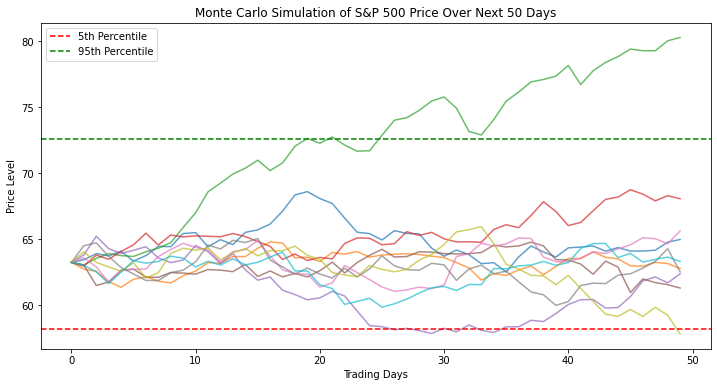

Latest price: $63.24
Mean final price: $65.18422216639406
Standard deviation: $4.377322612465018
5th percentile $58.22748395054889, meaning there's a 5% probability that the S&P 500 will fall below this level, representing a significant downside risk
95th percentile $72.6149169940582, meaning there's a 5% probability that the S&P 500 will exceed this level, indicating potential for strong bullish outcomes.


In [5]:
# Parameters for the simulation
np.random.seed(43)  # For reproducibility

# Simulation settings
trading_days = 50  # Approx. 6 months of trading days
initial_price = price_on_ending_date  # Approximate recent S&P 500 level
num_simulations = 500000 # Number of Monte Carlo simulations

# Simulate price paths
simulated_prices = np.zeros((trading_days, num_simulations))
simulated_prices[0] = initial_price

for t in range(1, trading_days):
    random_returns = np.random.normal(mean_daily_return, daily_volatility, num_simulations)
    simulated_prices[t] = simulated_prices[t-1] * (1 + random_returns)

# Summary statistics
final_prices = simulated_prices[-1]
mean_final_price = np.mean(final_prices)
std_final_price = np.std(final_prices)
percentile_5 = np.percentile(final_prices, 5)
percentile_95 = np.percentile(final_prices, 95)

# Plot a few simulated paths
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices[:, :10], alpha=0.7)
plt.title(f"Monte Carlo Simulation of S&P 500 Price Over Next {trading_days} Days")
plt.xlabel("Trading Days")
plt.ylabel("Price Level")
plt.axhline(y=percentile_5, color='r', linestyle='--', label="5th Percentile")
plt.axhline(y=percentile_95, color='g', linestyle='--', label="95th Percentile")
plt.legend()
plt.show()

print(f"Latest price: ${data['Price'][0]}")
print(f"Mean final price: ${mean_final_price}")
print(f"Standard deviation: ${std_final_price}")
print(f"5th percentile ${percentile_5}, meaning there's a 5% probability that the S&P 500 will fall below this level, representing a significant downside risk")
print(f"95th percentile ${percentile_95}, meaning there's a 5% probability that the S&P 500 will exceed this level, indicating potential for strong bullish outcomes.")
